# Lecture 1. 범주형 변수의 탐색

## 1.1 정형 데이터와 측정 척도의 종류
### 정형화된 데이터의 요소 
- 비정형 데이터 
    - 이미지: RGB 컬러 정보를 담고 있는 픽셀의 집합체 
    - 텍스트: 무의미한 문자를 순서대로 나열한 배열 
    - 웹페이지 방문내역: 사용자가 웹페이지를 이용하면서 만들어낸 일련의 반응들을 배열 형태로 모아놓은 것 
- 정형 데이터 
    - 원시데이터(raw data)를 가공하여 활용 가능한 형태의 정보로 변환하여 만들어낸 데이터 
    - Example
        - 한 문서 안에 포함된 긍정 단어의 개수 
        - 사용자의 시간대별 웹페이지 방문 비율
        - 웹페이지 방문자의 평균연령 
        
- 스프레드 시트와 같은 형태의 테이블 데이터로 정리하여 통계 분석에 활용

### 측정척도의 종류
척도의 종류에 따라 데이터를 분석하고 예측을 모델링하는 통계적 방법이 달라진다. 

#### 범주형 데이터 (categorical data)
가능한 범주 안의 값만 취할 수 있다. 
- 명목척도(nominal scale)
    - 전공: 경영학/인문학/교육학
    - TV 스크린 종류: 플라즈마/LCD/LED

- 순서척도(ordinal scale)<br>
   값들 사이에 분명한 수위가 있는 범주형 데이터
    - 직급: 대리/과장/부장/임원
    - 영화평점: 1/2/3/4/5
        

#### 수치형 데이터 (quantitative data)
- 연속형 데이터 (continuous data) <br>
    일정 범위 안에서 어떤 값이든 취할 수 있는 데이터 
    - 풍속, 지속시간, 온도, 키, 매출액 
- 이산형 데이터 (discrete data)<br>
    정수 값만 취할 수 있는 데이터 
    - 사건의 발생 빈도, 횟수 

#### Example
- M&M 초콜렛의 색깔(범주형, 명목)
- 기온(수치형, 연속형)
- 셔츠 사이즈 (S, M, L, XL)(범주형, 순서)
- S 사이즈 셔츠의 개수 (수치형, 이산형)
- 도시명 (범주형, 명목)

####  수치형으로 보이지만 아닌 것?
- 범주를 나타내는 숫자<br>
    Ex) 1-male, 0-female

- 측정한 자료가 아니라 label을 나타내는 숫자<br>
    Ex) 학번 
- Hint: 값들의 평균이 의미가 있는지 체크! 
    - 0.5 = (male)과 (female)의 평균??
- 리커트척도(매우불만, 불만, 만족, 매우만족): 범주형인지 수치형인지 구분 명확 X

## 1.2 범주형 변수의 시각화
### 무엇을 볼 것인가?
#### Example: 현 정부의 정책 지지율 -  찬성/반대/무응답
- 가장 많은 (혹은 적은) 사람이 적은 응답은? 어떤 답이 다른 답에 비해 상대적으로 많은가?
    - 변수: 지지율
- 교육 정책, 외교 정책, 경제 정책 등 서로 다른 정책에 대한 지지율은?
    - 변수: 지지율, 정책
- 시간의 흐름에 따른 지지율의 변화는? 
    - 변수: 시간, 지지율

### 1.2.1 한 범주형 변수의 요약 

#### Example: Loan 
- P2P 방식의 대출 사업을 선도하고 있는 Lending Club에서 제공하는 데이터
- 대출등급(grade): A-G
- 대출상환 상태(status): Fully paid(전액 상환), Current(진행 중), Late(연체), Charged off(삭제: 대출 잔여금 회수 불능) 

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt


data_path = "./data/" # data가 저장되어 있는 경로로 각자 수정 필요 

In [27]:
lc_loans = pd.read_csv(data_path+'lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [14]:
lc_loans.shape

(450961, 2)

In [15]:
lc_loans.dtypes

status    object
grade     object
dtype: object

- 데이터에 총 몇 개의 관측치가 있는가?

In [16]:
lc_loans.describe()
# top: mode (최빈값)

,status,grade
count,450961,450961
unique,4,7
top,Current,B
freq,321185,132370


- 각 범주형 변수가 몇 개의 범주(level)을 가지고 있는가?

In [6]:
lc_loans.status.nunique()

4

In [7]:
lc_loans.grade.nunique()

7

- 결측치가 있는가? 

In [8]:
lc_loans.isna() # == isnull()

,status,grade
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
450956,False,False
450957,False,False
450958,False,False
450959,False,False


In [9]:
lc_loans.isna().sum() # # == isnull().sum()

status    0
grade     0
dtype: int64

- 각 범주의 데이터가 몇 개씩 있는가? : 도수분포표 / frequency table

In [28]:
lc_loans.dtypes

status    object
grade     object
dtype: object

In [29]:
lc_loans.grade.value_counts(sort=True)

B    132370
C    120875
D     74277
A     72490
E     34804
F     12904
G      3241
Name: grade, dtype: int64

In [30]:
lc_loans.status.value_counts(sort=True)

Current        321185
Fully Paid      97316
Charged Off     22671
Late             9789
Name: status, dtype: int64

- 범주의 순서를 변경하려면? \
범주 순서 변경하려면 무조건 category로 타입을 바꿔줘야함

In [31]:
lc_loans.status= lc_loans.status.astype('category')
lc_loans.grade = lc_loans.grade.astype('category')

In [35]:
lc_loans.status = lc_loans.status.cat.reorder_categories(['Fully Paid', 'Current','Late', 'Charged Off' ])
lc_loans.status.value_counts(sort=False)

Fully Paid      97316
Current        321185
Late             9789
Charged Off     22671
Name: status, dtype: int64

#### 막대도표 (Bar plot)
- 도수분포표의 값을 막대기의 높이로 표현하여 시각화

In [37]:
status_tab = lc_loans.status.value_counts(sort=False)

In [38]:
status_tab

Fully Paid      97316
Current        321185
Late             9789
Charged Off     22671
Name: status, dtype: int64

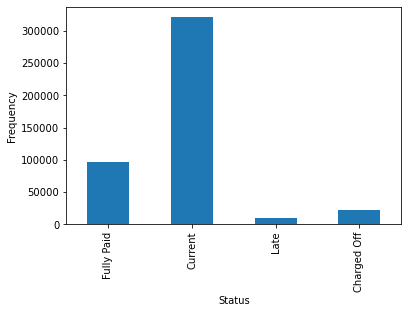

In [40]:
ax = status_tab.plot.bar()
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()


#### 원 그래프 (Pie chart) 
- 도수분포표의 빈도의 비율을 부채꼴 모양으로 나타낸 그래프

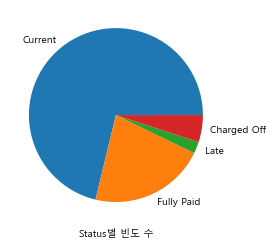

In [6]:
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name())

ax=status_tab.plot.pie()
ax.set_xlabel('Status별 빈도 수')
ax.set_ylabel('')
plt.show()

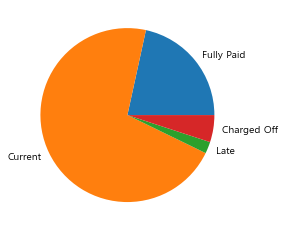

In [19]:
ax = status_tab.plot.pie()
ax.set_ylabel('')
plt.show()

#### `matplotlib`의 활용 
- 각종 그래프와 차트를 그리는 시각화 기능을 제공하는 패키지
- 상태저장(stateful) 인터페이스 
    - 그래프가 그려질 때마다 현재 그림이나 현재 축을 변경하는 방식
    - 몇 가지 사항을 신속하게 그릴때는 괜찮지만 여러 개의 좌표와 축을 다룰 때는 어려워짐
- 객체지향(object-oriented) 인터페이스 
    - 그려지는 그래프의 그림과 축을 변수에 저장하여 각 변수를 사용해 도면의 일부 속성을 변경 

In [43]:
status_tab.sort_values(ascending=False)

Current        321185
Fully Paid      97316
Charged Off     22671
Late             9789
Name: status, dtype: int64

In [44]:
status_tab.index

CategoricalIndex(['Fully Paid', 'Current', 'Late', 'Charged Off'], categories=['Fully Paid', 'Current', 'Late', 'Charged Off'], ordered=False, dtype='category')

data.plot.bar() 는 데이터만 주고 할 수 있음\
plt.bar(data.index, data) 를 줘야함

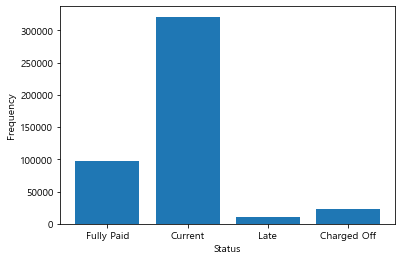

In [22]:
## stateful interface
plt.bar(status_tab.index,status_tab)
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

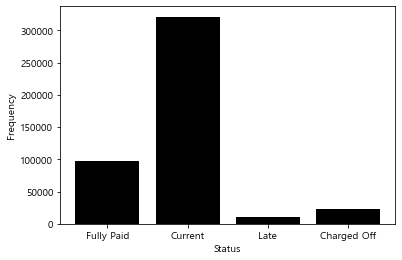

In [24]:
## object-oriented interface
fig, ax = plt.subplots()
ax.bar(status_tab.index, status_tab, color='black')
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()


#### Colors 

https://matplotlib.org/stable/tutorials/colors/colormaps.html

<img src="https://wikidocs.net/images/page/92085/set_color_03.PNG" width=70%>
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_006.png" width=50%>

In [50]:
from matplotlib import cm 
colors = cm.get_cmap('Set2')(np.arange(4))

In [51]:
colors

array([[0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.98823529, 0.55294118, 0.38431373, 1.        ],
       [0.55294118, 0.62745098, 0.79607843, 1.        ],
       [0.90588235, 0.54117647, 0.76470588, 1.        ]])

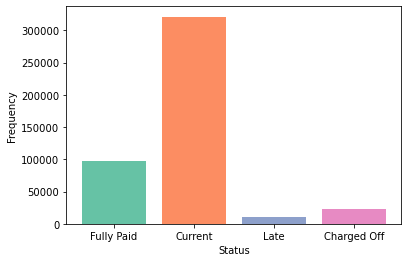

In [53]:
fig, ax = plt.subplots()
ax.bar(status_tab.index, status_tab, color=colors)
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()

#plt.bar(status_tab.index, status_tab, color=colors)
#plt.xlabel('Status')
#plt.ylabel('Frequency')
#plt.show()

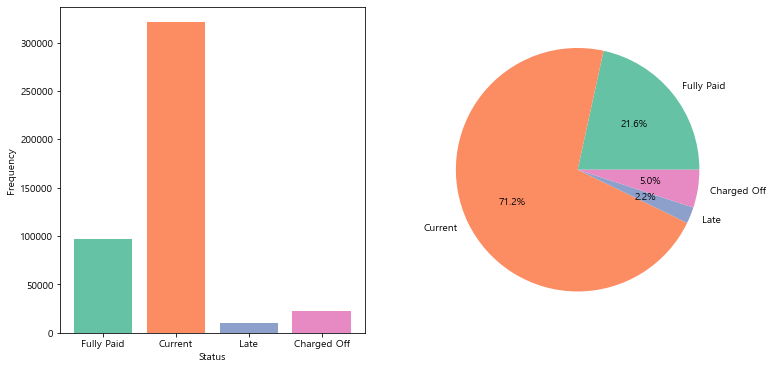

In [31]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].bar(status_tab.index, status_tab, color=colors)
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Frequency')

axes[1].pie(status_tab, labels = status_tab.index, autopct = "%.1f%%", colors=colors)
plt.show()

#### `seaborn`의 활용 
- `matplotlib`에서 제공하지 않는 고급 통계차트를 그리는 통계용 시각화 기능을 제공 

countplot 을 할때 밑과 같이 x축와 data가 어떤것인지 정해주고 count를 할수도 있고\
x축과 hue(hue별 x의 count) 와 data 를 정해준 뒤 count 를 할수도 있다.

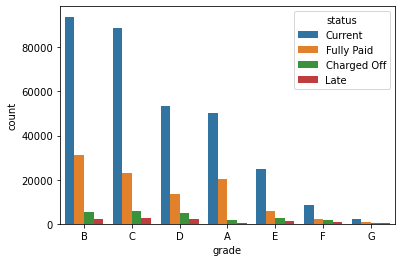

In [63]:
sns.countplot(x='grade', data=lc_loans, hue='status',order = lc_loans['grade'].value_counts().index,
              hue_order=lc_loans['status'].value_counts().index) 
plt.show()

In [38]:
lc_loans['grade'].value_counts().index

CategoricalIndex(['B', 'C', 'D', 'A', 'E', 'F', 'G'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, dtype='category')

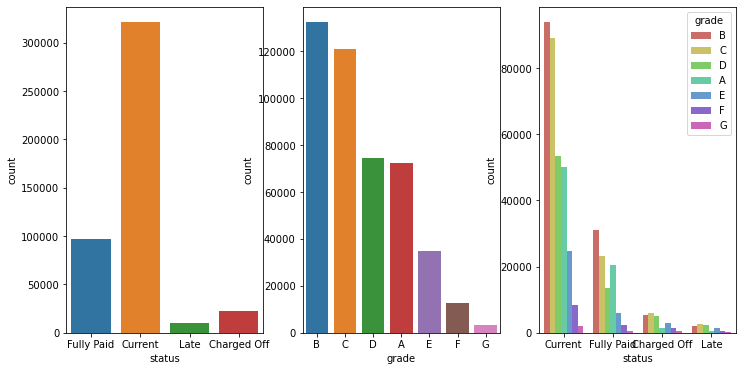

In [59]:
import seaborn as sns
fig, axes = plt.subplots(1,3, figsize=(12,6))
sns.countplot(x='status', data=lc_loans, ax = axes[0]) 
sns.countplot(x='grade', data=lc_loans, ax = axes[1], order = lc_loans['grade'].value_counts().index) 
sns.countplot(x='status',
    hue='grade',
    data=lc_loans,
    order=lc_loans.status.value_counts().index,
    hue_order=lc_loans.grade.value_counts().index,
    palette='hls',
    ax=axes[2])
plt.show()

### 1.2.2 두 범주형 변수의 관계 요약 
#### 분할표 (Cross table)
- 두 범주형 변수에 의해 생성되는 범주별 빈도수를 기록한 테이블 \
crosstab 은 count 만 가능하다고 보면 된다

In [77]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'index')
#행을 다 더하면 1이 되게 확률을 만들어 준다

grade,A,B,C,D,E,F,G
status,,,,,,,
Fully Paid,0.209709,0.320194,0.237854,0.140583,0.061131,0.023922,0.006607
Current,0.155832,0.292205,0.276875,0.165889,0.076713,0.026290,0.006196
Late,0.047911,0.210032,0.283686,0.235775,0.140362,0.061906,0.020329
Charged Off,0.068899,0.233867,0.265670,0.220855,0.125358,0.067311,0.018041
All,0.160746,0.293529,0.268039,0.164708,0.077177,0.028614,0.007187


In [78]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'columns')
#열을 다 더하면 1이 되게 확률을 만들어 준다

grade,A,B,C,D,E,F,G,All
status,,,,,,,,
Fully Paid,0.281528,0.235401,0.191495,0.184189,0.170929,0.180409,0.198396,0.215797
Current,0.690454,0.709013,0.735702,0.717328,0.707936,0.654371,0.614008,0.712223
Late,0.006470,0.015532,0.022974,0.031073,0.039478,0.046962,0.061401,0.021707
Charged Off,0.021548,0.040054,0.049828,0.067410,0.081657,0.118258,0.126196,0.050273


#### 두 범주형 변수를 사용한 bar plot
- 어느 변수를 그룹으로 표현할 것인가?
- 그룹 내의 비율을 고려할 필요가 있는가? 

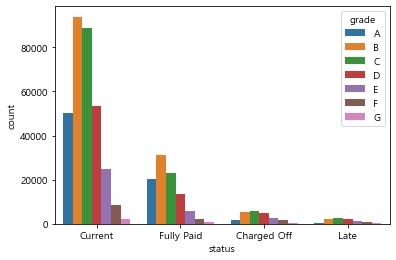

In [59]:
sns.countplot(x='status', hue='grade',data=lc_loans, order = lc_loans['status'].value_counts().index)
plt.show()

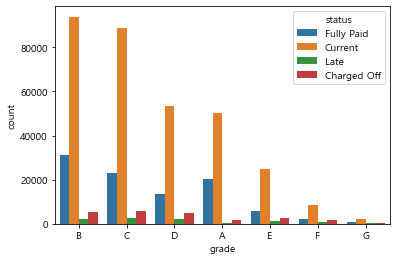

In [60]:
sns.countplot(x="grade", hue="status", data=lc_loans, order=lc_loans['grade'].value_counts().index)
plt.show()

In [85]:
xtab_col = pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'columns')
xtab_col

grade,A,B,C,D,E,F,G,All
status,,,,,,,,
Fully Paid,0.281528,0.235401,0.191495,0.184189,0.170929,0.180409,0.198396,0.215797
Current,0.690454,0.709013,0.735702,0.717328,0.707936,0.654371,0.614008,0.712223
Late,0.006470,0.015532,0.022974,0.031073,0.039478,0.046962,0.061401,0.021707
Charged Off,0.021548,0.040054,0.049828,0.067410,0.081657,0.118258,0.126196,0.050273


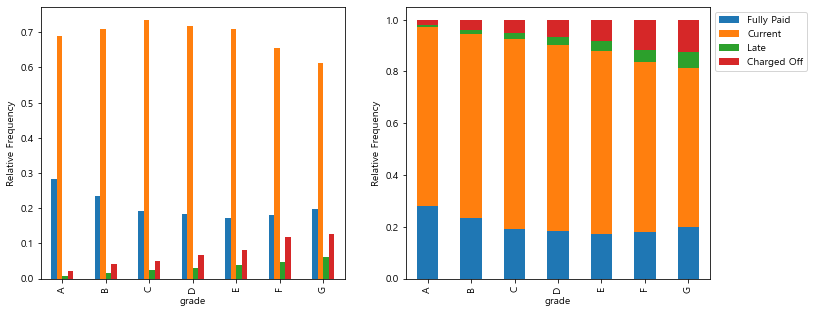

In [65]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

xtab_col.iloc[:,:-1].T.plot.bar(ax = axes[0], legend=False, ylabel = 'Relative Frequency')
xtab_col.iloc[:,:-1].T.plot.bar(stacked = True, ax = axes[1], ylabel = 'Relative Frequency')
axes[1].legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## 요약 자료의 활용

UC Berkeley 대학원의 6개 학과에 지원한 학생의 성별과 합격여부에 대한 자료

In [91]:
ucb= pd.read_csv(data_path +'UCBAdmissions.csv',index_col=0)

In [92]:
ucb.head()

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353


- 성별, 학과별 지원자의 빈도는 어떻게 다른가?

In [58]:
ucb.head()

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353


In [104]:
a=pd.crosstab(index=ucb.Gender,
    columns=ucb.Dept,
    values=ucb.Freq,
    aggfunc='sum',margins=True)

In [105]:
a.T

Gender,Female,Male,All
Dept,,,
A,108,825,933
B,25,560,585
C,593,325,918
D,375,417,792
E,393,191,584
F,341,373,714
All,1835,2691,4526


<AxesSubplot:xlabel='Gender'>

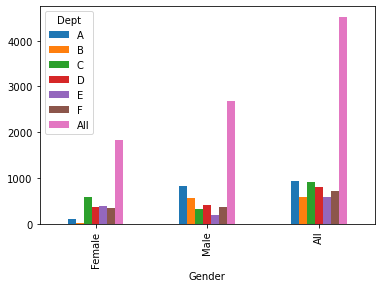

In [106]:
a.plot.bar()

In [111]:
ucb_gender_dept = ucb.pivot_table(index='Dept',columns='Gender',values='Freq',aggfunc='sum')
ucb_gender_dept

Gender,Female,Male
Dept,,
A,108,825
B,25,560
C,593,325
D,375,417
E,393,191
F,341,373


In [113]:
ucb.pivot_table(index='Dept',columns='Gender',values='Freq',aggfunc='sum',margins=True)

Gender,Female,Male,All
Dept,,,
A,108,825,933
B,25,560,585
C,593,325,918
D,375,417,792
E,393,191,584
F,341,373,714
All,1835,2691,4526


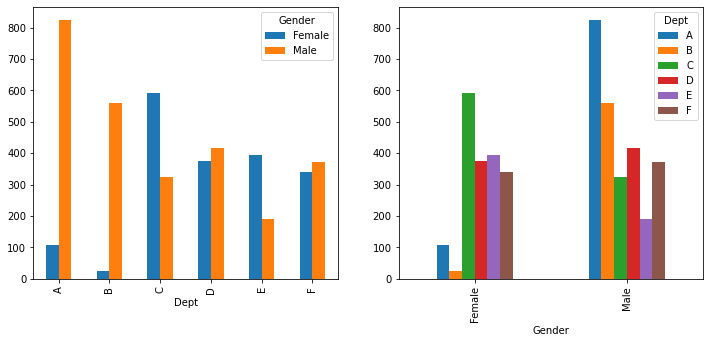

In [114]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
ucb_gender_dept.plot.bar(ax=axes[0])
ucb_gender_dept.T.plot.bar(ax=axes[1])
plt.show()

- 성별, 학과별 지원자의 비율은 어떻게 다른가?

In [115]:
ucb_gender_dept=ucb.pivot_table(index='Dept',columns='Gender',values='Freq',aggfunc='sum',margins=True)

In [119]:
ucb_gender_dept_rowprop=ucb_gender_dept.divide(ucb_gender_dept['All'],axis=0)
ucb_gender_dept_colprop = ucb_gender_dept.divide(ucb_gender_dept.loc['All',:],axis=1)

In [120]:
ucb_gender_dept_rowprop

Gender,Female,Male,All
Dept,,,
A,0.115756,0.884244,1.0
B,0.042735,0.957265,1.0
C,0.645969,0.354031,1.0
D,0.473485,0.526515,1.0
E,0.672945,0.327055,1.0
F,0.477591,0.522409,1.0
All,0.405435,0.594565,1.0


In [121]:
ucb_gender_dept_colprop

Gender,Female,Male,All
Dept,,,
A,0.058856,0.306577,0.206142
B,0.013624,0.208101,0.129253
C,0.323161,0.120773,0.202828
D,0.204360,0.154961,0.174989
E,0.214169,0.070977,0.129032
F,0.185831,0.138610,0.157755
All,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Dept'>

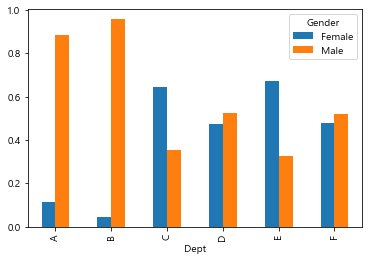

In [79]:
pd.crosstab(index=ucb.Dept, columns=ucb.Gender, values=ucb.Freq,
    aggfunc='sum',
    margins=True,
    normalize='index').iloc[:-1,:].plot.bar()

<AxesSubplot:xlabel='Dept'>

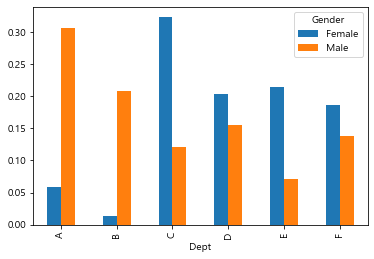

In [78]:
pd.crosstab(index=ucb.Dept, columns=ucb.Gender, values=ucb.Freq,
    aggfunc='sum',
    margins=True,
    normalize='columns').iloc[:,:-1].plot.bar()

In [81]:
ucb_gender_dept_rowprop=ucb_gender_dept_rowprop.iloc[:-1,:-1]
ucb_gender_dept_colprop=ucb_gender_dept_colprop.iloc[:-1,:-1]

In [82]:
ucb_gender_dept_colprop

Gender,Female,Male
Dept,,
A,0.058856,0.306577
B,0.013624,0.208101
C,0.323161,0.120773
D,0.204360,0.154961
E,0.214169,0.070977
F,0.185831,0.138610


<AxesSubplot:xlabel='Dept'>

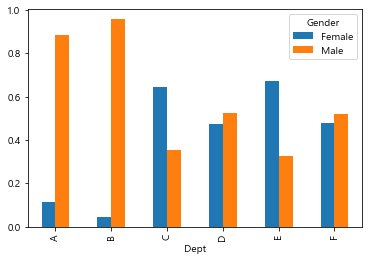

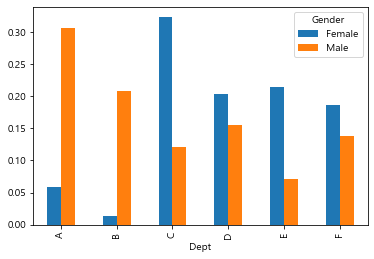

In [87]:
ucb_gender_dept_rowprop.plot.bar()
ucb_gender_dept_colprop.plot.bar()

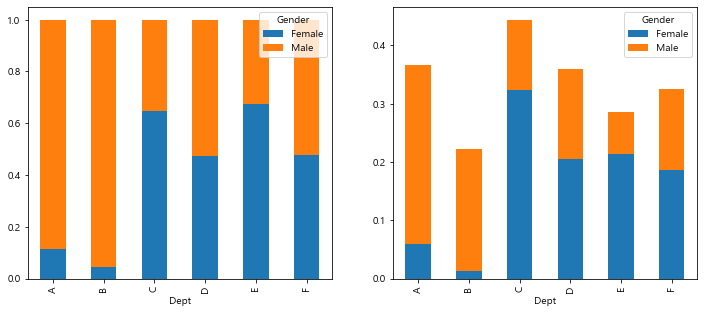

In [88]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ucb_gender_dept_rowprop.plot.bar(ax=axes[0],stacked=True)
ucb_gender_dept_colprop.plot.bar(ax=axes[1], stacked=True)
plt.show()

- 성별, 학과별 지원자의 합격율은 어떻게 다른가?

In [89]:
ucb.head()

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353


성별 별 합격률

In [137]:
ucb.pivot_table(values='Freq',
    index='Gender',
    columns='Admit',
    aggfunc='sum',
    margins=True)

Admit,Admitted,Rejected,All
Gender,,,
Female,557,1278,1835
Male,1198,1493,2691
All,1755,2771,4526


In [138]:
ucb_all = ucb.pivot_table(index='Gender',columns="Admit",values='Freq',aggfunc='sum',margins=True)

In [65]:
ucb_all.divide(ucb_all['All'],axis=0)

Admit,Admitted,Rejected,All
Gender,,,
Female,0.303542,0.696458,1.0
Male,0.445188,0.554812,1.0
All,0.387760,0.612240,1.0


In [85]:
pd.crosstab(index=ucb.Gender,columns=ucb.Admit, values=ucb.Freq, aggfunc='sum',margins=True, normalize='index').iloc[:-1,:]

Admit,Admitted,Rejected
Gender,,
Female,0.303542,0.696458
Male,0.445188,0.554812


<AxesSubplot:xlabel='Gender'>

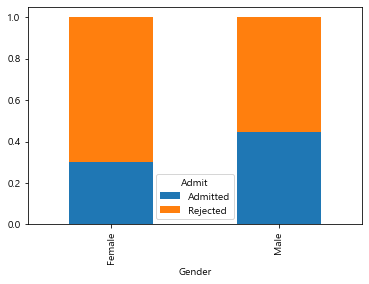

In [87]:
pd.crosstab(index=ucb.Gender,columns=ucb.Admit, values=ucb.Freq, aggfunc='sum',margins=True, normalize='index').iloc[:-1,:].plot.bar(stacked=True)

성별 학과별 합격률

In [92]:
ucb_ratio=pd.crosstab(index=ucb[ucb.Admit=='Admitted'].Gender,
    columns=ucb[ucb.Admit=='Admitted'].Dept,
    values=ucb[ucb.Admit=='Admitted'].Freq,
    aggfunc='sum')/pd.crosstab(index=ucb.Gender,
    columns=ucb.Dept,
    values=ucb.Freq,
    aggfunc='sum')

In [95]:
All=ucb.pivot_table(index='Gender',columns='Dept',values='Freq',aggfunc='sum')

In [96]:
admit=ucb[ucb['Admit']=='Admitted'].pivot_table(index='Gender',columns='Dept',values='Freq',aggfunc='sum')

In [97]:
admit/All

Dept,A,B,C,D,E,F
Gender,,,,,,
Female,0.824074,0.680000,0.340641,0.349333,0.239186,0.070381
Male,0.620606,0.630357,0.369231,0.330935,0.277487,0.058981


In [98]:
ucb_ratio=admit/All

<AxesSubplot:xlabel='Gender'>

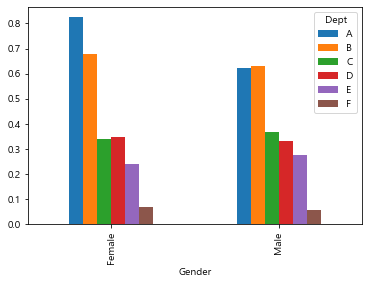

In [95]:
ucb_ratio.plot.bar()

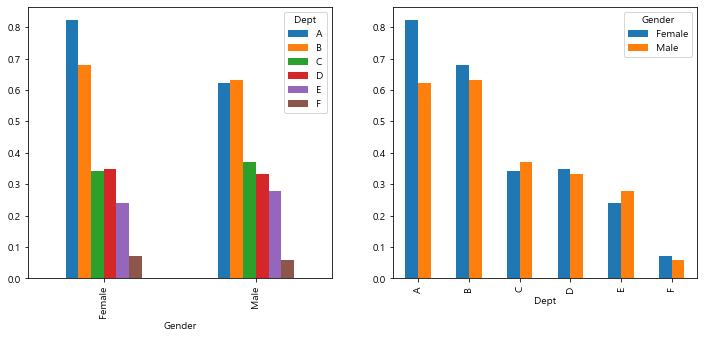

In [93]:
fig, axes= plt.subplots(1,2,figsize=(12,5))
ucb_ratio.plot.bar(ax=axes[0])
ucb_ratio.T.plot.bar(ax=axes[1])
plt.show()

####  Mosaic plot
- 분할표에서 각 범주의 비율을 상자의 너비와 높이로 표현하여 비교하는 그래프
- Grade가 높을 수록 Fully Paid의 비율이 높은 것을 확인 가능

In [96]:
lc_loans.sort_values('grade')

,status,grade
450960,Fully Paid,A
287650,Current,A
287665,Current,A
287669,Current,A
287670,Current,A
...,...,...
314896,Current,G
187777,Current,G
215181,Fully Paid,G
212476,Charged Off,G


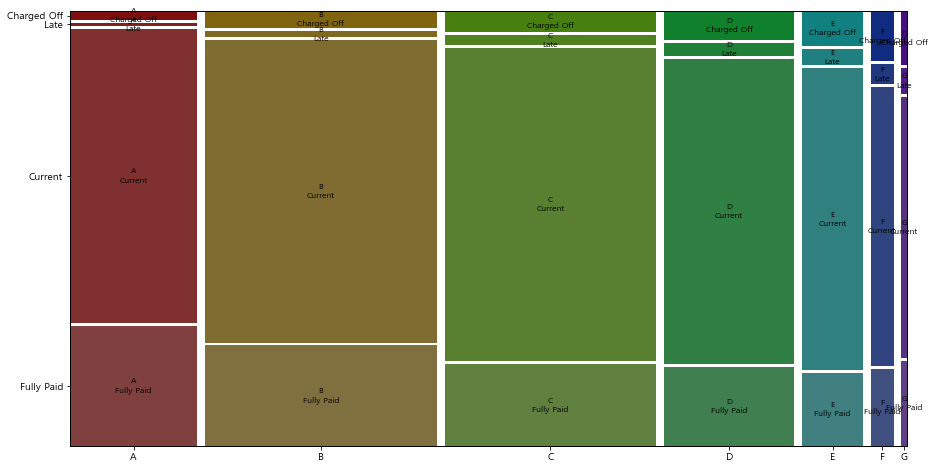

In [100]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [15, 8]

mosaic(lc_loans.sort_values('grade'), ['grade', 'status'],axes_label=True, gap=0.01)
plt.show()

In [101]:
ucb.head()

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353


In [152]:
import plotly.express as px
px.sunburst(ucb, path=['Admit','Gender','Dept'], values='Freq',color='Admit')

In [103]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

In [107]:
px.sunburst(df, path=['continent', 'country'], values='pop')

In [65]:
px.sunburst(lc_loans, path = ['grade','status'])